In [1]:
# -------------------------------------------------------------------------------------------------------------------
# Course name - Exploratory data analysis
# Course code - DSC530
# Week 5 assignment
# Script name - Shekhar530Week5.ipynb
# Creator - Manish Shekhar
# Date created - Jan 9th to Jan 12th
# -------------------------------------------------------------------------------------------------------------------

### Reading and cleaning Behavioral Risk Factor Surveillance System (BRFSS) data

In [23]:
# [Manish] - Importing required libraries
import sys
import numpy as np
import thinkstats2
import matplotlib.pyplot as plt
import math
import statistics
import thinkplot
import pandas as pd
import scipy
#import hinc

from collections import defaultdict


# User defined functions to clean the "Behavioral Risk Factor Surveillance System (BRFSS)" data file 
def CleanBrfssFrame(df):
    """Recodes BRFSS variables.
    df: DataFrame
    """
    # clean age
    df.age.replace([7, 9], float('NaN'), inplace=True)

    # clean height
    df.htm3.replace([999], float('NaN'), inplace=True)

    # clean weight
    df.wtkg2.replace([99999], float('NaN'), inplace=True)
    df.wtkg2 /= 100.0

    # clean weight a year ago
    df.wtyrago.replace([7777, 9999], float('NaN'), inplace=True)
    df['wtyrago'] = df.wtyrago.apply(lambda x: x/2.2 if x < 9000 else x-9000)


# User defined functions to read the "Behavioral Risk Factor Surveillance System (BRFSS)" data file  
def ReadBrfss(filename='/Users/mshekhar/Downloads/CDBRFS08.ASC.gz', compression='gzip', nrows=None):
    """Reads the BRFSS data.
    filename: string
    compression: string
    nrows: int number of rows to read, or None for all
    returns: DataFrame
    """
    var_info = [
        ('age', 101, 102, int),
        ('sex', 143, 143, int),
        ('wtyrago', 127, 130, int),
        ('finalwt', 799, 808, int),
        ('wtkg2', 1254, 1258, int),
        ('htm3', 1251, 1253, int),
        ]
    columns = ['name', 'start', 'end', 'type']
    variables = pandas.DataFrame(var_info, columns=columns)
    variables.end += 1
    dct = thinkstats2.FixedWidthVariables(variables, index_base=1)

    df = dct.ReadFixedWidth(filename, compression=compression, nrows=nrows)
    CleanBrfssFrame(df)
    return df

In [24]:
# User defined function to plot different figures 
def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.
    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label='weights')

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = math.sqrt(var)
    print('n, mean, std', len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)


def MakeNormalPlot(weights):
    """Generates a normal probability plot of birth weights.
    weights: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = math.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='weights')


def MakeFigures(df):
    """Generates CDFs and normal prob plots for weights and log weights."""
    weights = df.wtkg2.dropna()
    log_weights = np.log10(weights)

    # plot weights on linear and log scales
    thinkplot.PrePlot(cols=2)
    MakeNormalModel(weights)
    thinkplot.Config(xlabel='adult weight (kg)', ylabel='CDF')

    thinkplot.SubPlot(2)
    MakeNormalModel(log_weights)
    thinkplot.Config(xlabel='adult weight (log10 kg)')

    thinkplot.Save(root='brfss_weight')

    # make normal probability plots on linear and log scales
    thinkplot.PrePlot(cols=2)
    MakeNormalPlot(weights)
    thinkplot.Config(xlabel='z', ylabel='weights (kg)')

    thinkplot.SubPlot(2)
    MakeNormalPlot(log_weights)
    thinkplot.Config(xlabel='z', ylabel='weights (log10 kg)')

    thinkplot.Save(root='brfss_weight_normal')

In [25]:
# User defined function to summarize the data
def Summarize(df, column, title):
    """Print summary statistics male, female and all."""

    items = [
        ('all', df[column]),
        ('male', df[df.sex == 1][column]),
        ('female', df[df.sex == 2][column]),
        ]

    print(title)
    print('key\tn\tmean\tvar\tstd\tcv')
    for key, series in items:
        mean, var = series.mean(), series.var()
        std = math.sqrt(var)
        cv = std / mean
        t = key, len(series), mean, var, std, cv
        print('%s\t%d\t%4.2f\t%4.2f\t%4.2f\t%4.4f' % t)

### 5-1 In order to join Blue Man Group, you have to be male and between 5′10″ and 6′1″ tall. What percentage of the US male population is in this range?

In [3]:
# Read and clean the data file
import thinkstats2
thinkstats2.RandomSeed(17)
df = ReadBrfss()

NameError: name 'ReadBrfss' is not defined

In [27]:
# Creating dataset with just male and just with female
df_male = df[df.sex == 1]
df_female = df[df.sex == 2]

In [28]:
# Check summary stats of male dataset
df_male.describe()

,age,sex,wtyrago,finalwt,wtkg2,htm3
count,154810.000000,155703.0,151505.000000,155703.000000,153900.000000,154407.000000
mean,54.114237,1.0,89.880639,727.426119,89.016966,178.066221
std,16.383712,0.0,19.260805,1370.544678,18.240528,7.723563
min,18.000000,1.0,22.727273,2.046527,20.000000,61.000000
25%,42.000000,1.0,77.272727,120.320178,77.270000,173.000000
50%,55.000000,1.0,86.363636,306.175045,86.360000,178.000000
75%,66.000000,1.0,100.000000,757.592649,98.180000,183.000000
max,99.000000,1.0,304.545455,60995.111700,300.000000,236.000000


In [29]:
# Check summary stats of female dataset
df_female.describe()

,age,sex,wtyrago,finalwt,wtkg2,htm3
count,256046.000000,258806.0,238894.000000,258806.000000,244584.000000,254722.000000
mean,55.314401,2.0,73.278344,462.115407,72.684712,163.223475
std,16.932158,0.0,18.678964,836.457063,17.609006,7.269156
min,18.000000,2.0,22.727273,1.695143,22.730000,61.000000
25%,43.000000,2.0,60.454545,85.185547,60.910000,157.000000
50%,55.000000,2.0,69.090909,203.544128,68.640000,163.000000
75%,68.000000,2.0,81.818182,500.624197,81.820000,168.000000
max,99.000000,2.0,342.272727,29401.437200,309.090000,229.000000


In [30]:
# save the mean and standard deviation of the male dataframe as only they can join the Blue man group
mean = df_male['htm3'].mean()
std = df_male['htm3'].std()
print(mean, std)

178.06622109101272 7.723563454782443


In [31]:
# create a scipy norm object i.e. normal distribution with same mean and standard deviation as of height of 
# male dataframe
from scipy.stats import norm
norm_dist = norm(mean,std)
type(norm_dist)

scipy.stats._distn_infrastructure.rv_continuous_frozen

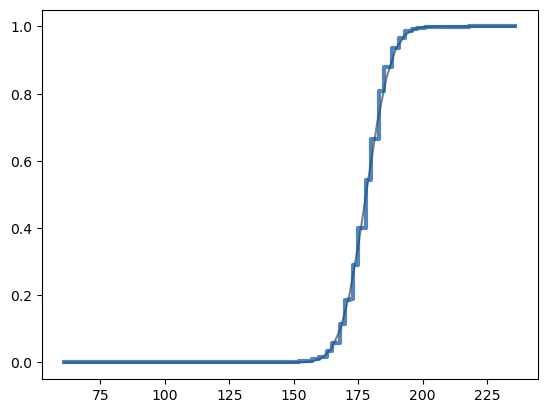

In [32]:
# Evaluate the model CDF
xs = np.linspace(61, 236)
ys = norm_dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the cdf of the data at hand
cdf_male_height = thinkstats2.Cdf(df_male['htm3'])

thinkplot.PrePlot(1)
thinkplot.Cdfs([cdf_male_height])

# Height of male looks like to fairly well represented by normal distribution.

In [33]:
# In order to join Blue Man Group, you have to be male and between 5′10″ and 6′1″ tall. 
# What percentage of the US male population is in this range?
low = norm_dist.cdf(177.8)   # 5'10" in centimeters is 177.8
high = norm_dist.cdf(185.4)   # 6'1" in centimeters is 185.4
low, high, high-low

###################
# ANSWER ----------
###################
# As CDF is similar to percentiles except it normalizes data values between 0 and 1 i.e. into probablities.
# Thus about 34% of Us male population is in the range of 5'10" and 6'1" and thus eligible to join Blue Man Group.


(0.48625170584113814, 0.8288252192710317, 0.34257351342989356)

### 5-2  To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters Xm = 1m and a = 1.7 and , we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m. 

### Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

In [34]:
# Create a pareto distribution of human heights
alpha = 1.7
xmin = 1
pareto_dist = scipy.stats.pareto(b=alpha, scale=xmin)
pareto_dist.median()

1.5034066538560549

In [35]:
# Mean height per the Pareto distribution
pareto_dist.mean()

2.428571428571429

Text(0, 0.5, 'Pareto CDF')

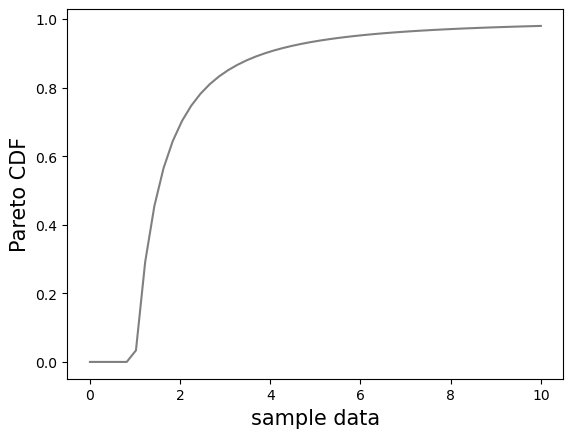

In [36]:
# Evaluate the model CDF
xs = np.linspace(0, 10)
ys = pareto_dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

plt.xlabel('sample data', fontsize=15)
plt.ylabel('Pareto CDF', fontsize=15)

In [37]:
# To know what % of people are shorter than mean check the cdf at Pareto mean
pareto_dist.cdf(pareto_dist.mean())

# Thus about 77% of people are shorter or equal to the mean of 2.42 m 

0.778739697565288

In [38]:
# Out of 7 billion people, how many do we expect to be taller than 1 km? We can use pareto_dist.cdf or pareto_dist.sf
# As height is in meter considering 1000 m for 1 km.
# pareto_dist.cdf(1000) will give us % of population <= 1km in height, to get population% taller we need to substract 
# from 1. As total cdf will always be 1. Result will be population 
# 7e9 is exponential form of 7 billion
(1 - pareto_dist.cdf(1000))*7e9



55602.976430479954

In [39]:
# How high will be the tallest person ?
# find the height that yields about 1 person
(1 - pareto_dist.cdf(610000)) * 7e9

# Thus tallest person will be approx 610 km tall.

1.023380935549767

### Example 6 - 1  The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is.

In [4]:
# Reading and cleaning household income data file
import pandas as pd
df_hinc = pd.read_csv('/Users/mshekhar/Downloads/hinc06.csv')
df_hinc.head()

,Income of Household,All Races Number,All Races Mean Income Dollars,All Races Standard Error,White A.O.I.C. Number,White A.O.I.C. Mean Income Dollars,White A.O.I.C. Standard Error,White alone (1) Number,White alone (1) Mean Income Dollars,White alone (1) Standard Error,...,Black alone (2) Standard Error,Asian A.O.I.C. Number,Asian A.O.I.C. Mean Income Dollars,Asian A.O.I.C. Standard Error,Asian alone (3) Number,Asian alone (3) Mean Income Dollars,Asian alone (3) Standard Error,Hispanic (any race) Number,Hispanic (any race) Mean Income Dollars,Hispanic (any race) Standard Error
0,....Total,"122,459","71,274",421,"99,273","74,225",457,"97,705","74,416",464,...,753,"5,872","91,703","1,894","5,560","91,400","1,836","15,589","53,422",698
1,"Under $5,000","4,204","1,183",47,"2,773","1,202",61,"2,704","1,205",62,...,95,241,432,180,233,382,184,716,"1,417",89
2,"$5,000 to $9,999","4,729","7,944",32,"3,208","7,905",43,"3,133","7,905",43,...,49,152,"7,533",185,142,"7,576",167,787,"7,858",74
3,"$10,000 to $14,999","6,982","12,419",25,"5,189","12,495",29,"5,072","12,500",30,...,52,208,"12,073",133,201,"12,094",131,"1,112","12,191",56
4,"$15,000 to $19,999","7,157","17,262",25,"5,623","17,275",33,"5,522","17,271",32,...,56,201,"17,390",164,190,"17,349",167,"1,118","17,130",65


In [5]:
# Data cleaning and filtering
# 1. Removing the first row from the dataset as it represents total income across all bands
# 2. Keeping only first 4 columns as we are not concerend to analyze respective ethnecity.
df_hinc_clean = df_hinc[['Income of Household', 'All Races Number','All Races Mean Income Dollars','All Races Standard Error']].tail(-1)
df_hinc_clean

,Income of Household,All Races Number,All Races Mean Income Dollars,All Races Standard Error
1,"Under $5,000","4,204","1,183",47
2,"$5,000 to $9,999","4,729","7,944",32
3,"$10,000 to $14,999","6,982","12,419",25
4,"$15,000 to $19,999","7,157","17,262",25
5,"$20,000 to $24,999","7,131","22,230",30
6,"$25,000 to $29,999","6,740","27,193",29
7,"$30,000 to $34,999","6,354","32,080",30
8,"$35,000 to $39,999","5,832","37,056",29
9,"$40,000 to $44,999","5,547","42,034",28
10,"$45,000 to $49,999","5,254","47,160",30


In [6]:
# To see whether the distribution of income is well modeled by a lognormal distribution, 
# we'll compare the CDF of the logarithm of the data to a 
# normal distribution with the same mean and standard deviation. 
import numpy as np
import locale
locale.setlocale(locale.LC_NUMERIC, '')

# Extract income and compute its log
# Casting string income as integer
log_income = np.log10(df_hinc_clean['All Races Mean Income Dollars'].apply(locale.atof))


# Compute mean and standard deviation
mean, std = log_income.mean(), log_income.std()

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

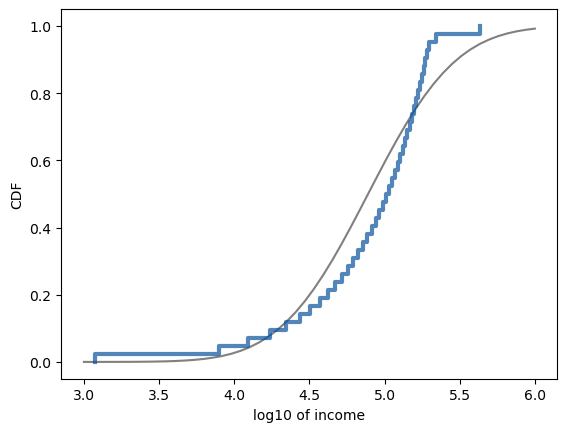

In [8]:
# Evaluate the model CDF
xs = np.linspace(3, 6)
ys = dist.cdf(xs)

# Plot the model CDF
import matplotlib.pyplot as plt
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
import thinkstats2
cdf_log_income = thinkstats2.Cdf(log_income)

import thinkplot
thinkplot.PrePlot(1)
thinkplot.Cdfs([cdf_log_income])

    
# Label the axes
plt.xlabel('log10 of income')
plt.ylabel('CDF')
plt.show()


# lognormal distribution appears to be distribution that can represent the income data approximately.

/var/folders/tb/46g9m78d4y1b91l8ybsbqc980000gq/T/ipykernel_54946/4044932504.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'All Races Number':'freq', 'All Races Mean Income Dollars':'income'}, inplace= True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


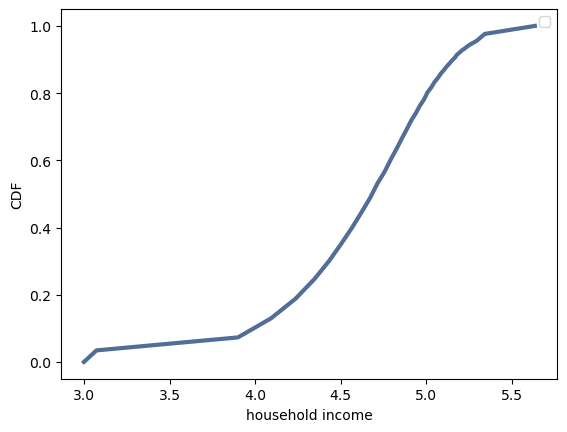

<Figure size 800x600 with 0 Axes>

In [10]:
# Per the question. To estimate mean and other statistics from these data, we have to make some assumptions 
# about the lower and upper bounds, and how the values are distributed in each range. 
# hinc2.py provides InterpolateSample, which shows one way to model this data. 
# It takes a DataFrame with a column, income, that contains the upper bound of each range, and freq, 
# which contains the number of respondents in each frame.It also takes log_upper, 
# which is an assumed upper bound on the highest range, expressed in log10 dollars. 
# The default value, log_upper=6.0 represents the assumption that the largest income among the respondents is 10^6, 
# or one million dollars.InterpolateSample generates a pseudo-sample; 
# that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. 
# It assumes that incomes in each range are equally spaced on a log10 scale.

# Create the dataset with income and freq only
df = df_hinc_clean[['All Races Number','All Races Mean Income Dollars']]
df.rename(columns={'All Races Number':'freq', 'All Races Mean Income Dollars':'income'}, inplace= True)
df_clean = df.applymap(lambda x: str(x.replace(',','')))
df_clean['freq'] = df_clean['freq'].astype(int)
df_clean['income'] = df_clean['income'].astype(int)
df_clean.head()

# """Makes a sample of log10 household income. Assumes that log10 income is uniform in each range.
# df: DataFrame with columns income and freq
# log_upper: log10 of the assumed upper bound for the highest range
# returns: NumPy array of log10 household income"""
# compute the log10 of the upper bound for each range
df_clean['log_upper'] = np.log10(df_clean.income)


# get the lower bounds by shifting the upper bound and filling in
# the first element
df_clean['log_lower'] = df_clean.log_upper.shift(1)
df_clean.at[1, 'log_lower'] = 3.0


# use the freq column to generate the right number of values in
# each range
arrays = []
for _, row in df_clean.iterrows():
    vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
    arrays.append(vals)

# collect the arrays into a single sample
log_sample = np.concatenate(arrays)


# plot the cdf of log10 of income
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Show(xlabel='household income',ylabel='CDF')

In [15]:
# Missing piece of code
sample = np.power(10, log_sample)

In [16]:
# Skewness is a property that describes the shape of a distribution. If the distribution
# is symmetric around its central tendency, it is unskewed. If the values
# extend farther to the right, it is “right skewed” and if the values extend left, it is “left skewed.”
# Calculating mean, median, and Pearson's skewness of the resulting sample.
# Pearson’s median skewness coefficient is a measure of skewness based on the difference between the sample mean 
# and median
import math

# User defined function to calculate Median of the sample using CDF (i.e. at CDF value 0.5 we 
# know value has probability of occuring less than or equal to 50% of the times)
def Median(xs):
    cdf = thinkstats2.MakeCdfFromList(xs)
    return cdf.Value(0.5)

def Mean(XS):
    mean = RawMoment(xs, 1)
    return mean

def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

# User defined function to calculate Perason's skewness using difference between mean and median
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

# Calling Median()
# Corrected code
Median_using_CDF = Median(sample)

# calling Mean()
# Corrected code
Mean_using_moment = Mean(sample)

# Calling PearsonMedianSkewness
# Corrected code
Skewness = PearsonMedianSkewness(sample)

# Printing mean, median, and skewness
print(Mean_using_moment, Median_using_CDF, Skewness)

########### Observations ##################
# The mean, 4.5, is a bit less than the median, 4.684, so that is consistent with left skew. 
# Pearson’s median skewness is -0.49.

4.500000000000001 48323.89687164477 0.8374970832169277


In [13]:
# What fraction of households reports a taxable income below the mean?
# Finding the the CDF at the mean to answer
cdf = thinkstats2.MakeCdfFromList(sample)
cdf[4.5]

# Thus about 34% of households reports a taxable income below mean in the given sample.

0

In [62]:
# How do the results depend on the assumed upper bound?
# Let's look at the range of income data
# To accomodate all data we need it to be atleast represented by 10^6.
print(df_clean['income'].max(),df_clean['income'].min())

431783 1183


In [69]:
# Looking at the range of income data above we can represent max income by 10^6 or by log(10)1000000
# If we look at upper vallues it varies between 3 and 6.
# Representing by log(10) scale has also made income data more evenly distributed in each household group.
# The logarithmic scale is useful for plotting data that includes very small numbers and very large numbers 
# because the scale plots the data so you can see all the numbers easily, 
# without the small numbers squeezed too closely.
# Adding upper and lower bounds in original dataset
df_clean

,freq,income,log_upper,log_lower
1,4204,1183,3.072985,3.000000
2,4729,7944,3.900039,3.072985
3,6982,12419,4.094087,3.900039
4,7157,17262,4.237091,4.094087
5,7131,22230,4.346939,4.237091
6,6740,27193,4.434457,4.346939
7,6354,32080,4.506234,4.434457
8,5832,37056,4.568859,4.506234
9,5547,42034,4.623601,4.568859
10,5254,47160,4.673574,4.623601
